# サーマル RJPEG 画像加工　デモ

### 環境準備

In [0]:
# 所要時間 20秒
!apt-get update
!sudo apt-get install exiftool
# !sudo pip install numpy matplotlib
# !sudo pip install flirimageextractor

#### サンプル実行

In [0]:
rm -rf Thermimage_demo 

In [0]:
!git clone https://github.com/Chitama/Thermimage_demo.git

Cloning into 'Thermimage_demo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 2), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [0]:
cd Thermimage_demo

/content/Thermimage_demo


#### イメージアップロード

In [0]:
# 実行ボタンがクルクル回っている間にファイルをアップロードする
from google.colab import files
import os
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
exiftool_path = "exiftool"
flir_img_filename = "/content/Thermimage_demo/" + file_name
flir_csv_filename = "/content/Thermimage_demo/" + file_name + "_output.csv"
print(file_name)
print(flir_img_filename)

flir_img_filename_list = []
flir_csv_filename_list = []
for f_nm_ext in list(uploaded.keys()):
  f_nm,ext = os.path.splitext(os.path.basename(file_name))
  flir_img_filename_list.append("/content/Thermimage_demo/" + f_nm_ext)
  flir_csv_filename_list.append("/content/Thermimage_demo/" + f_nm + "_output.csv")

print(flir_img_filename_list)
print(flir_csv_filename_list)

Saving DJI_0419_R.JPG to DJI_0419_R.JPG
DJI_0419_R.JPG
/content/Thermimage_demo/DJI_0419_R.JPG
['/content/Thermimage_demo/DJI_0419_R.JPG']
['/content/Thermimage_demo/DJI_0419_R_output.csv']


In [0]:
flir_img_filename

In [0]:
# 利用停止中
# エラーになるので、プログラムに変更中
!exiftool flir_img_filename

File not found: flir_img_filename


In [0]:
# exiftool情報を確認
import json
import subprocess
import numpy as np

# ここは、exiftoolのコマンドを実行して
exiftool_path = "exiftool"
meta_json_tmp = subprocess.check_output([exiftool_path, flir_img_filename, '-j'])
meta_json_tmp

# meta_tmp = json.loads(meta_json_tmp)
meta_tmp = json.loads(meta_json_tmp.decode())[0]

meta_tmp

In [0]:
# アップロードした画像を確認
from IPython.display import Image,display_jpeg
print(flir_img_filename)
display_jpeg(Image(flir_img_filename))

# .resize((int(img.width / 2), int(img.height / 2)))

In [0]:
# アップロードした画像を確認
from IPython.display import Image,display_jpeg
print(flir_img_filename)
display_jpeg(Image(flir_img_filename))

In [0]:
# 任意の温度以上を指定
temp_val = 25

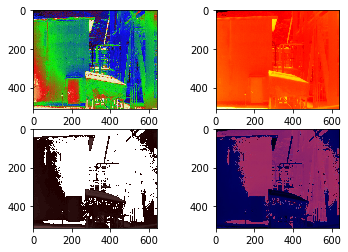

In [0]:
# 温度解析
import flir_image_extractor_custom
fir = flir_image_extractor_custom.FlirImageExtractor()
# fir.process_image('/content/Thermimage_demo/DJI_0151_R.JPG', flir_csv_filename, temp_val_range_less)
fir.process_image(flir_img_filename, flir_csv_filename, temp_val)
fir.plot()

##### 結果の説明
- ①右上：元画像
- ②左上：赤外線画像をベクトル化してプロットしたもの
- ③右下：指定温度以上のピクセルだけ抜き出したもの
- ④左下：指定温度以上のピクセル部分の色だけを変えたもの
# ------
- 任意の温度以上を指定 -> 結果1
- 任意の温度以下を指定 -> 結果2
- 任意の温度範囲を指定 -> 結果3


### CSV

##### CSV出力結果

------ ------ ------ ------
指定温度 [ 32.705 ℃ ] 以上の割合： 2.02 %
指定温度 [ 28.5875 ℃ ] 以上 [ 32.705 ℃ ] 以下の割合： 2.25 %
指定温度 [ 28.5875 ℃ ] 以下の割合： 95.72 %
------ ------ ------ ------
最大温度： 47.54 ℃
最小温度： 7.0 ℃
------ ------ ------ ------


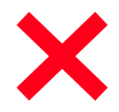

異常な数値が検出されました。


In [0]:
######################################
# 検出対象の規定割合(%)
terget_rang = 40 
# 任意の温度以上を指定 -> 結果1
temp_val_more_than = 32.705
# 任意の温度以下を指定 -> 結果2
temp_val_less_than = 28.5875
# 任意の温度を指定 -> 結果3
temp_val_range_more = 28.5875
temp_val_range_less = 32.705
######################################

# 画像の温度情報を確認
import pandas as pd 
data= pd.read_csv(flir_csv_filename)
total_count = len(data["temp (c)"].dropna(how='any'))
temp_more = len(data[data["temp (c)"] >= temp_val_more_than].dropna(how='any'))/total_count*100
temp_less = len(data[data["temp (c)"] <= temp_val_less_than].dropna(how='any'))/total_count*100
temp_range = len(data[(data["temp (c)"] >= temp_val_range_more) & (data["temp (c)"] <= temp_val_range_less)].dropna(how='any'))/total_count*100

print("------ ------ ------ ------")
print("指定温度 [ " + str(temp_val_more_than) + " ℃ ] 以上の割合： "  +  str(round(temp_more, 2)) + " %")
print("指定温度 [ " + str(temp_val_range_more) + " ℃ ] 以上 [ " + str(temp_val_range_less) + " ℃ ] 以下の割合： "  +  str(round(temp_range, 2)) + " %")
print("指定温度 [ " + str(temp_val_less_than) + " ℃ ] 以下の割合： "  +  str(round(temp_less, 2)) + " %")
print("------ ------ ------ ------")
print("最大温度： " +  str(round(data["temp (c)"].max(), 2)) + " ℃")
print("最小温度： " +  str(round(data["temp (c)"].min(), 2)) + " ℃")
print("------ ------ ------ ------")
data


from IPython.display import Image,display_jpeg,display_png
if round(temp_more, 2) > terget_rang:
  display_png(Image("/content/Thermimage_demo/img/m40_ok.png"))
  print("問題ありません。")

else:
  display_png(Image("/content/Thermimage_demo/img/m_ng.png"))
  print("異常な数値が検出されました。")

------ ------ ------ ------
指定温度 [ 32.705 ℃ ] 以上の割合： 2.02 %
指定温度 [ 28.5875 ℃ ] 以上 [ 32.705 ℃ ] 以下の割合： 2.25 %
指定温度 [ 28.5875 ℃ ] 以下の割合： 95.72 %
------ ------ ------ ------
最大温度： 47.54 ℃
最小温度： 7.0 ℃
------ ------ ------ ------


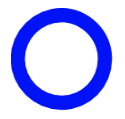

問題ありません。


In [0]:
######################################
# 検出対象の規定割合(%)
terget_rang = 50
# 任意の温度以上を指定 -> 結果1
temp_val_more_than = 32.705
# 任意の温度以下を指定 -> 結果2
temp_val_less_than = 28.5875
# 任意の温度を指定 -> 結果3
temp_val_range_more = 28.5875
temp_val_range_less = 32.705
######################################

# 画像の温度情報を確認
import pandas as pd 
data= pd.read_csv(flir_csv_filename)
total_count = len(data["temp (c)"].dropna(how='any'))
temp_more = len(data[data["temp (c)"] >= temp_val_more_than].dropna(how='any'))/total_count*100
temp_less = len(data[data["temp (c)"] <= temp_val_less_than].dropna(how='any'))/total_count*100
temp_range = len(data[(data["temp (c)"] >= temp_val_range_more) & (data["temp (c)"] <= temp_val_range_less)].dropna(how='any'))/total_count*100

print("------ ------ ------ ------")
print("指定温度 [ " + str(temp_val_more_than) + " ℃ ] 以上の割合： "  +  str(round(temp_more, 2)) + " %")
print("指定温度 [ " + str(temp_val_range_more) + " ℃ ] 以上 [ " + str(temp_val_range_less) + " ℃ ] 以下の割合： "  +  str(round(temp_range, 2)) + " %")
print("指定温度 [ " + str(temp_val_less_than) + " ℃ ] 以下の割合： "  +  str(round(temp_less, 2)) + " %")
print("------ ------ ------ ------")
print("最大温度： " +  str(round(data["temp (c)"].max(), 2)) + " ℃")
print("最小温度： " +  str(round(data["temp (c)"].min(), 2)) + " ℃")
print("------ ------ ------ ------")
data


from IPython.display import Image,display_jpeg,display_png
if round(temp_more, 2) < terget_rang:
  display_png(Image("/content/Thermimage_demo/img/m_ok.png"))
  print("問題ありません。")

else:
  display_png(Image("/content/Thermimage_demo/img/m_ng.png"))
  print("異常な数値が検出されました。")